 ## Parametric approach to density estimation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mu, sigma = 0, 0.1
z = np.random.normal(mu, sigma, 200)[:, np.newaxis]

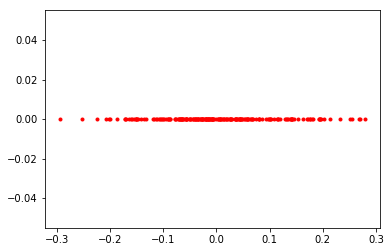

In [4]:
plt.plot(z, np.zeros_like(z), 'r.')
plt.show()

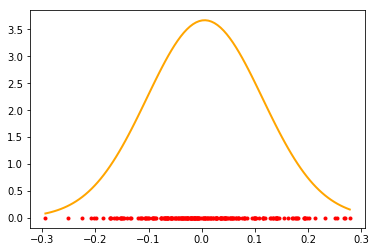

In [5]:
sample_mean = np.mean(z)
sample_std = np.std(z)
x = np.linspace(np.min(z), np.max(z), 100)[:, np.newaxis]
plt.plot(z, np.zeros_like(z), 'r.')
plt.plot(x, 1/(sample_std * np.sqrt(2 * np.pi)) * np.exp( - (x - sample_mean)**2 / (2 * sample_std**2) ), linewidth=2, color='orange')
plt.show()

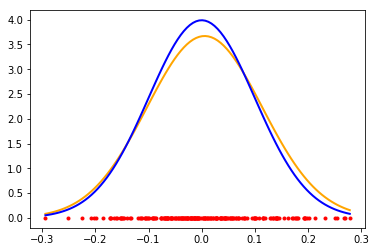

In [6]:
plt.plot(z, np.zeros_like(z), 'r.')
plt.plot(x, 1/(sample_std * np.sqrt(2 * np.pi)) * np.exp( - (x - sample_mean)**2 / (2 * sample_std**2) ), linewidth=2, color='orange')
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='blue')
plt.show()

In [7]:
m1, s1, m2, s2 = -0.2, 0.1, 0.2, 0.1
z1 = np.random.normal(m1, s1, 100)
z2 = np.random.normal(m2, s2, 300)
zz = np.concatenate((z1, z2))[:, np.newaxis]

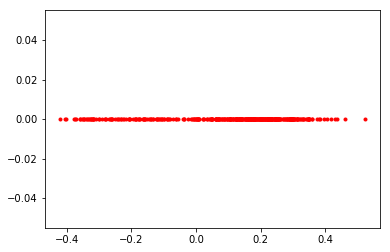

In [8]:
plt.plot(zz, np.zeros_like(zz), 'r.')
plt.show()

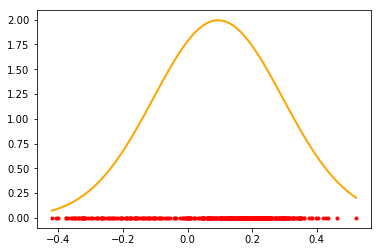

In [9]:
sample_mean = np.mean(zz)
sample_std = np.std(zz)
x = np.linspace(np.min(zz), np.max(zz), 100)[:, np.newaxis]
plt.plot(zz, np.zeros_like(zz), 'r.')
plt.plot(x, 1/(sample_std * np.sqrt(2 * np.pi)) * np.exp( - (x - sample_mean)**2 / (2 * sample_std**2) ), linewidth=2, color='orange')
plt.show()

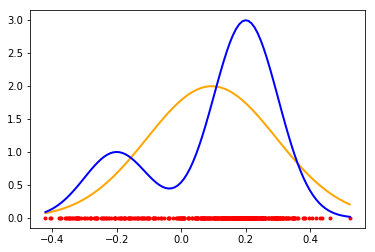

In [10]:
plt.plot(zz, np.zeros_like(zz), 'r.')
plt.plot(x, 1/(sample_std * np.sqrt(2 * np.pi)) * np.exp( - (x - sample_mean)**2 / (2 * sample_std**2) ), linewidth=2, color='orange')
plt.plot(x, 1/4 * 1/(s1 * np.sqrt(2 * np.pi)) * np.exp( - (x - m1)**2 / (2 * s1**2) ) + 3/4 * 1/(s2 * np.sqrt(2 * np.pi)) * np.exp( - (x - m2)**2 / (2 * s2**2) ), linewidth=2, color='blue')
plt.show()

 ## Nonparametric approach to density estimation

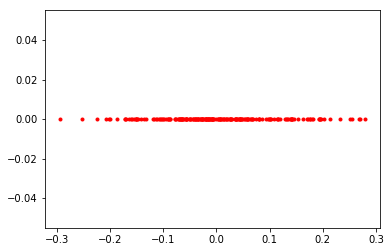

In [11]:
plt.plot(z, np.zeros_like(z), 'r.')
plt.show()

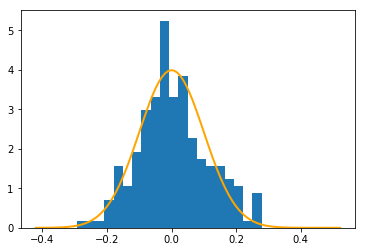

In [12]:
count, bins, ignored = plt.hist(z, 20, normed=True)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='orange')
plt.show()

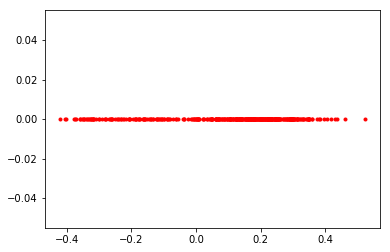

In [13]:
plt.plot(zz, np.zeros_like(zz), 'r.')
plt.show()

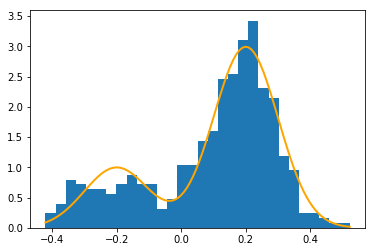

In [14]:
count, bins, ignored = plt.hist(zz, 30, normed=True)
plt.plot(x, 1/4 * 1/(s1 * np.sqrt(2 * np.pi)) * np.exp( - (x - m1)**2 / (2 * s1**2) ) + 3/4 * 1/(s2 * np.sqrt(2 * np.pi)) * np.exp( - (x - m2)**2 / (2 * s2**2) ), linewidth=2, color='orange')
plt.show()
#plt.subplot(1, 1, 2)

### ------------------------------------------------
### Limitations of the histogram approach
### ------------------------------------------------

### Nonparametric approach - (1) Kernel method

In [15]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

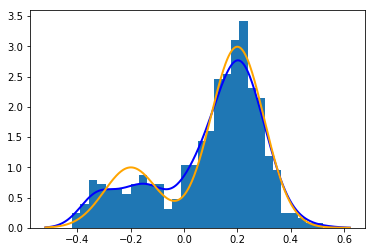

In [16]:
#zz = np.concatenate((np.random.normal(-0.2, 0.1, 100), np.random.normal(0.2, 0.1, 300)))[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(zz)
xx = np.linspace(np.min(zz)-0.1, np.max(zz)+0.1, 400)[:, np.newaxis]
count, bins, ignored = plt.hist(zz, 30, normed=True)
plt.plot(xx, np.exp(kde.score_samples(xx)), linewidth=2, color='blue')
plt.plot(xx, 1/4 * 1/(s1 * np.sqrt(2 * np.pi)) * np.exp( - (xx - m1)**2 / (2 * s1**2) ) + 3/4 * 1/(s2 * np.sqrt(2 * np.pi)) * np.exp( - (xx - m2)**2 / (2 * s2**2) ), linewidth=2, color='orange')
plt.show()

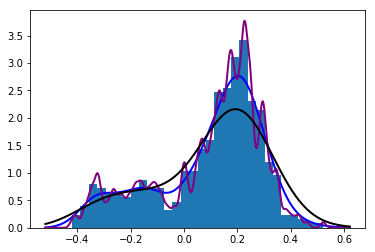

In [17]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(zz)
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(zz)
kde3 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(zz)
xx = np.linspace(np.min(zz)-0.1, np.max(zz)+0.1, 400)[:, np.newaxis]
count, bins, ignored = plt.hist(zz, 30, normed=True)
plt.plot(xx, np.exp(kde1.score_samples(xx)), linewidth=2, color='blue')
plt.plot(xx, np.exp(kde2.score_samples(xx)), linewidth=2, color='purple')
plt.plot(xx, np.exp(kde3.score_samples(xx)), linewidth=2, color='black')
plt.show()

### Nonparametric approach - (2) Nearest-neighbour method

Kernel method
 - Fixed h (i.e. region size)
 - The number of inputs lying on a kernel (i.e. k) is determined by sample data
 
Nearest-neighbour method
 - Fixed k (i.e. the number of inputs lying in a region is pre-determined)
 - The region size is determined by sample data

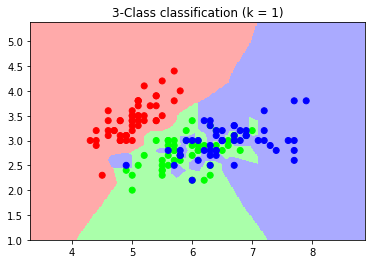

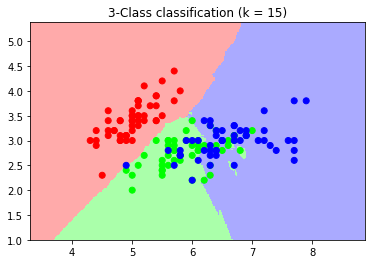

In [18]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [1, 15]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()